In [1]:
!pip install dataprep

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.6/152.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 67.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

csv_file = '/content/drive/MyDrive/CollegeDistance.csv'
df = pd.read_csv(csv_file)



Mounted at /content/drive


Podstawowe informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4739 entries, 0 to 4738
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rownames   4739 non-null   int64  
 1   gender     4739 non-null   object 
 2   ethnicity  4739 non-null   object 
 3   score      4739 non-null   float64
 4   fcollege   4739 non-null   object 
 5   mcollege   4739 non-null   object 
 6   home       4739 non-null   object 
 7   urban      4739 non-null   object 
 8   unemp      4739 non-null   float64
 9   wage       4739 non-null   float64
 10  distance   4739 non-null   float64
 11  tuition    4739 non-null   float64
 12  education  4739 non-null   int64  
 13  income     4739 non-null   object 
 14  region     4739 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 555.5+ KB
None

Podgląd danych:
   rownames  gender ethnicity      score fcollege mcollege home urban  unemp  \
0         1    

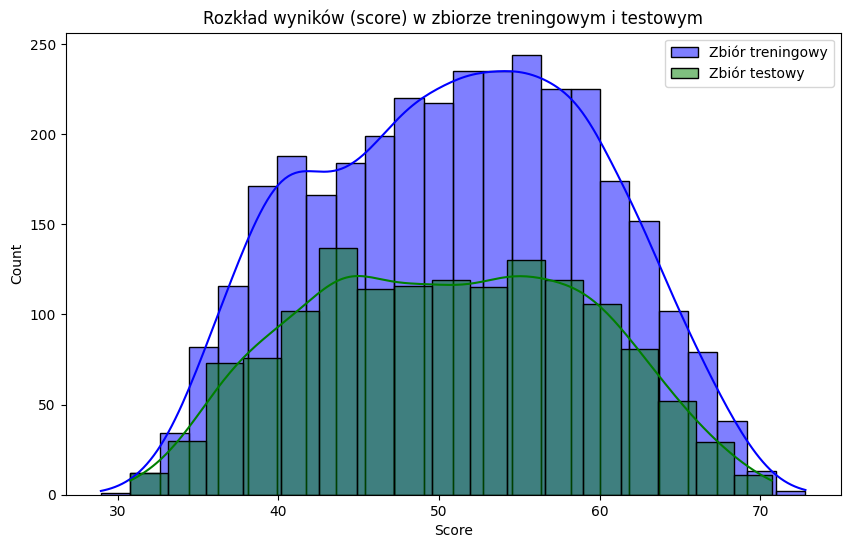

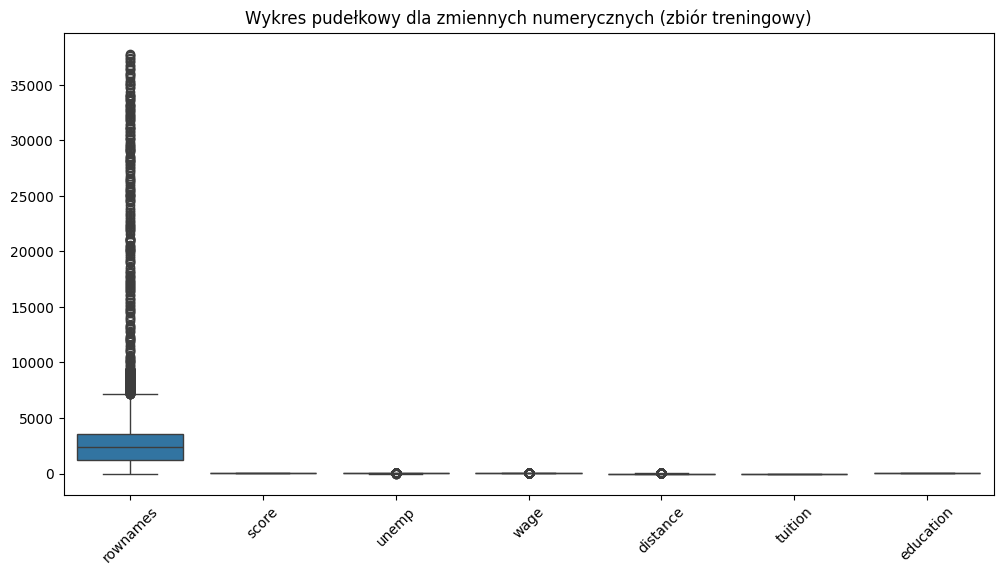

<ipython-input-4-966a69130d1f>:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)


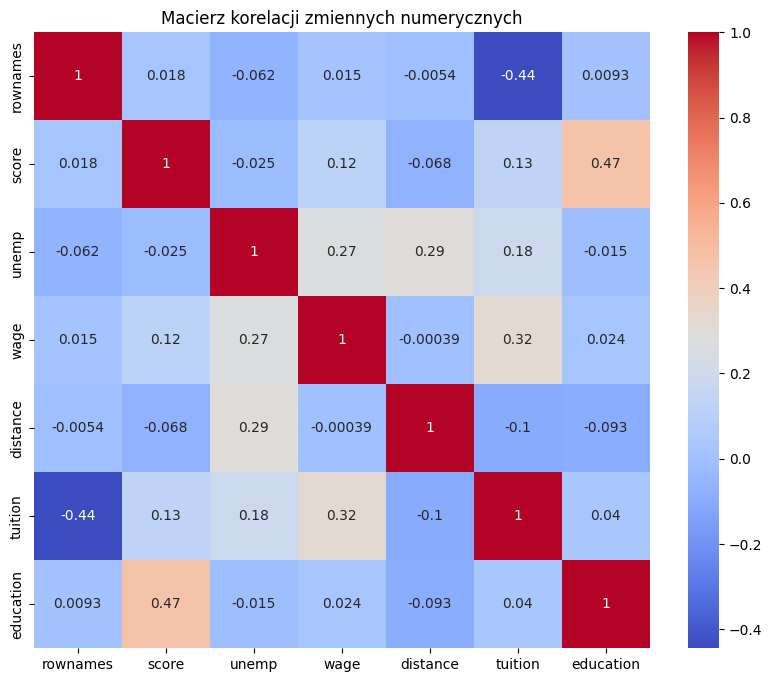

In [4]:
print("Podstawowe informacje o danych:")
print(df.info())

print("\nPodgląd danych:")
print(df.head())

print("\nStatystyki opisowe:")
print(df.describe())

missing_values = df.isnull().sum()
print("\nLiczba brakujących wartości w kolumnach:")
print(missing_values[missing_values > 0])

train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
print("\nRozmiar zbioru treningowego:", train_data.shape)
print("Rozmiar zbioru testowego:", test_data.shape)

print("\nStatystyki opisowe dla zbioru treningowego:")
print(train_data.describe())

print("\nStatystyki opisowe dla zbioru testowego:")
print(test_data.describe())

plt.figure(figsize=(10, 6))
sns.histplot(train_data['score'], kde=True, color='blue', label='Zbiór treningowy')
sns.histplot(test_data['score'], kde=True, color='green', label='Zbiór testowy')
plt.xlabel("Score")
plt.legend()
plt.title("Rozkład wyników (score) w zbiorze treningowym i testowym")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data.select_dtypes(include='number'))
plt.title("Wykres pudełkowy dla zmiennych numerycznych (zbiór treningowy)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Macierz korelacji zmiennych numerycznych")
plt.show()

In [5]:
from dataprep.eda import create_report

print("Generowanie automatycznego raportu za pomocą Dataprep...")
report = create_report(df)

report.save("/content/Raport_Profilowania_Dataprep.html")

from google.colab import files
files.download("/content/Raport_Profilowania_Dataprep.html")


Generowanie automatycznego raportu za pomocą Dataprep...


Computing finalize-e238ed18-ff0a-4210-8f3d-04eb67db38dc:  80%|███████▉  | 1593/1993 [00:00<00:00, 1671.87it/s]                                /usr/local/lib/python3.10/dist-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Report has been saved to /content/Raport_Profilowania_Dataprep.html!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
X = df.drop('score', axis=1)
y = df['score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

import pandas as pd

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [10]:
!pip install tpot

from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

print("Najlepszy model sugerowany przez TPOT:")
print(tpot.fitted_pipeline_)

score = tpot.score(X_test, y_test)
print("Dokładność na zbiorze testowym:", score)

tpot.export('/content/tpot_best_model.py')


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -49.72206130938032

Generation 2 - Current best internal CV score: -49.72206130938032

Generation 3 - Current best internal CV score: -49.72206130938032

Generation 4 - Current best internal CV score: -49.72206130938032

Generation 5 - Current best internal CV score: -49.63060232528132

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.4, min_samples_leaf=18, min_samples_split=16, n_estimators=100)
Najlepszy model sugerowany przez TPOT:
Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(max_features=0.4, min_samples_leaf=18,
                                       min_samples_split=16,
                                       random_state=42))])
Dokładność na zbiorze testowym: -51.44407048610144


In [11]:
from sklearn.model_selection import train_test_split
import joblib

X_temp, X_later, y_temp, y_later = train_test_split(X, y, test_size=0.3, random_state=42)

joblib.dump((X_later, y_later), '/content/later_data.pkl')

X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

print(f"Rozmiar zbioru treningowego: {X_train.shape}")
print(f"Rozmiar zbioru testowego: {X_test.shape}")
print(f"Rozmiar zbioru do późniejszego dotrenowania: {X_later.shape}")


Rozmiar zbioru treningowego: (2653, 14)
Rozmiar zbioru testowego: (664, 14)
Rozmiar zbioru do późniejszego dotrenowania: (1422, 14)


In [15]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [17]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd bezwzględny (MAE): {mae}")
print(f"Średni błąd kwadratowy (MSE): {mse}")
print(f"Współczynnik determinacji (R^2): {r2}")


Średni błąd bezwzględny (MAE): 6.116989417076111
Średni błąd kwadratowy (MSE): 56.616319381181
Współczynnik determinacji (R^2): 0.2882900190356311
